### **데이터 불러오기**
- 사이킷런 내장 데이터셋인 wine data를 불러오겠습니다.

In [9]:
# 아래 코드를 실행해 주세요 :)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
wine = load_wine()

#**1. wine data 살펴보기**

### **1-a. 데이터 세트 확인 및 변환**

In [6]:
# wine 데이터 세트 설명 출력 (실행해서 확인해주세요.)

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

 `wine` 데이터 세트를 DataFrame으로 변환하겠습니다. `#####` 을 채워주세요.

In [13]:
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환

columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
           'total_phenols', 'flavanoids','nonflavanoid_phenols', 'proanthocyanins',
           'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wineDF = pd.DataFrame(wine.data, columns=columns)
wineDF['target'] = wine.target
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


###**1-b. 데이터 시각화**

- pandas DataFrame의 ```corr()``` 메소드를 이용해 각 속성 간의 상관도를 구한 뒤, 이를 Seaborn의 ```heatmap```으로 시각화 하겠습니다.
- `#####` 을 채운 후, 시각화 결과를 바탕으로 아래의 질문에 답해주세요.

In [14]:
### Feature, Target 분리

y_target = wineDF['target']
X_features = wineDF.drop('target', axis = 1)

<ipython-input-16-f81a2bad013c>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


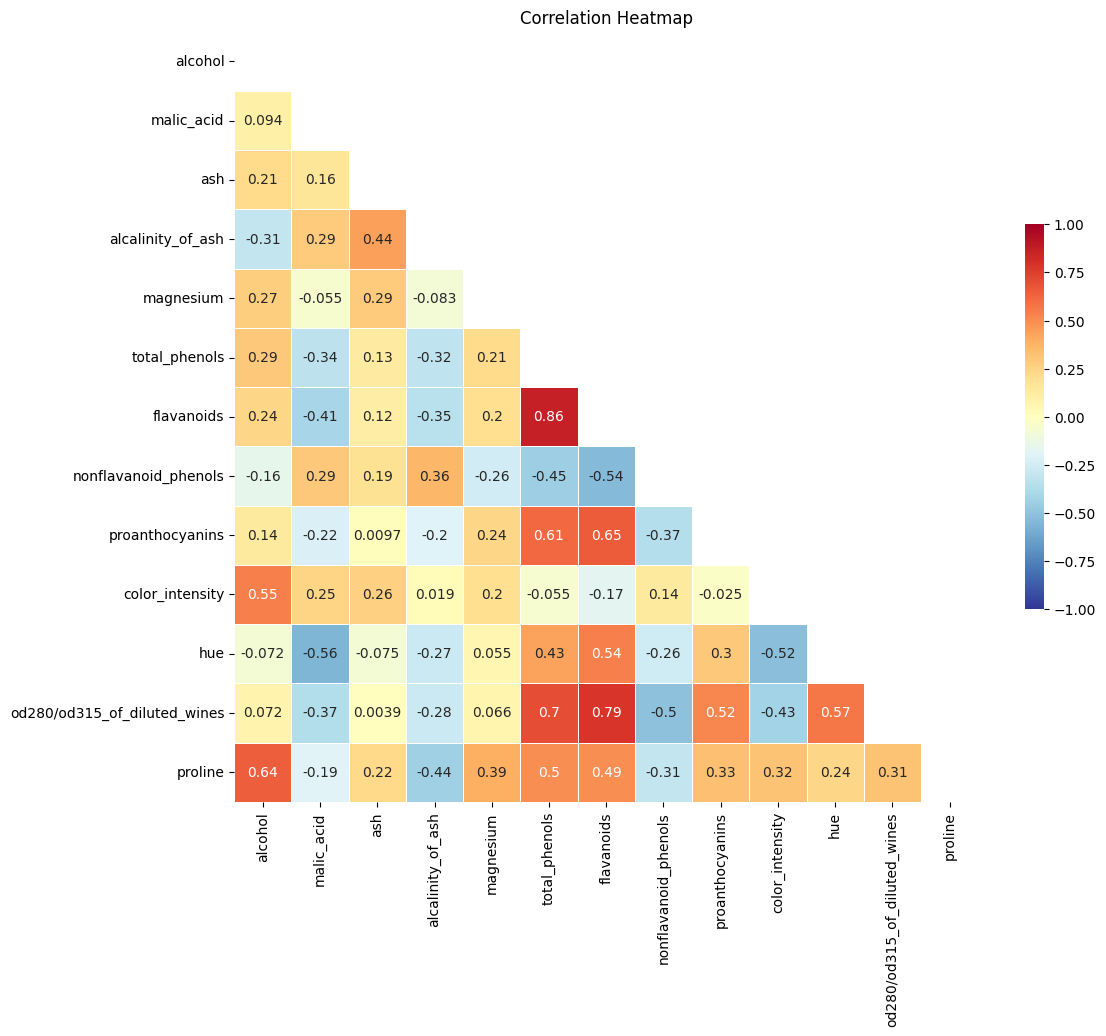

In [16]:
### 상관계수 시각화

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 각 속성 간의 상관도를 구한다
corr = X_features.corr()

## 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (12,10))

## 삼각형 마스크 만들기(위쪽 삼각형에 True, 아래쪽 삼각형에 False)
# 아래만 시각화 되도록
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

## 하삼각행렬만(밑에만) 시각화
sns.heatmap(corr,
            cmap = 'RdYlBu_r', # 색상 palette
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

##### **Q. 가장 높은 상관관계를 가진 변수는 무엇인가요?**

A. flavanoids와 total_phenols 속성끼리의 상관도가 0.86으로 가장 높다.

---

- 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화 해보겠습니다.
- X축과 Y축 속성은 바로 위의 문제에 대한 답으로 설정해주세요.
- `#####` 을 채워주세요.

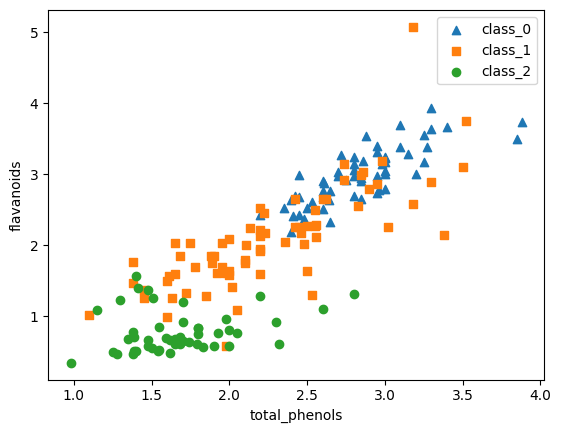

In [17]:
# class_0을 세모, class_1을 네모, class_2를 동그라미로 표시
markers = ['^', 's', 'o']

# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF['target'] == i]['total_phenols']
    y_axis_data = wineDF[wineDF['target'] == i]['flavanoids']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = wine.target_names[i])

plt.legend()
plt.xlabel('total_phenols')
plt.ylabel('flavanoids')
plt.show()

#**2. PCA(Principal Component Analysis)**

- 원본 데이터 세트와 2개의 주성분으로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교해 보겠습니다.

### **2-a. 원본 데이터 세트**

- 원본 데이터 세트에 랜덤 포레스트를 적용하고, 3개의 교차 검증 세트로 정확도 결과를 비교하겠습니다.
- `#####` 을 채워주세요.

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv = 3)

print('원본 데이터 교차 검증 개별 정확도:', np.round(scores, 4))
print('원본 데이터 평균 정확도: {0:.4f}' .format(np.mean(scores)))

원본 데이터 교차 검증 개별 정확도: [0.9333 0.8983 0.9831]
원본 데이터 평균 정확도: 0.9382


###**2-b. PCA 변환 데이터 세트**

- 2개의 주성분으로 PCA 변환한 데이터 세트에 `랜덤 포레스트`를 적용하고, 3개의 교차 검증 세트로 정확도 결과를 비교하겠습니다.
- `#####` 을 채워주세요.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(X_features)

# 2개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)
scores_pca = cross_val_score(rcf, wine_pca, y_target, scoring = 'accuracy', cv = 3)

print('PCA 변환 데이터 교차 검증 개별 정확도:', np.round(scores_pca, 4))
print('PCA 변환 데이터 평균 정확도: {0:.4f}' .format(np.mean(scores_pca)))

PCA 변환 데이터 교차 검증 개별 정확도: [0.9333 0.9153 0.9492]
PCA 변환 데이터 평균 정확도: 0.9326


###**2-c. PCA 변환 데이터 세트 시각화**

- 2개의 속성으로 PCA 변환된 데이터 세트를 **2차원** 평면 상에 시각화 해보겠습니다.
- `#####` 을 채워주세요.

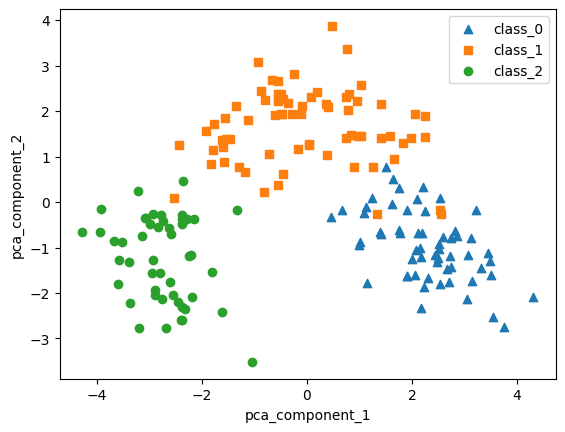

In [25]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns= ['pca_component_1', 'pca_component_2']
wineDF_pca = pd.DataFrame(wine_pca, columns = pca_columns)
wineDF_pca['target'] = wine.target

# class_0을 세모, class_1을 네모, class_2를 동그라미로 표시
markers = ['^', 's', 'o']

# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca['target'] == i]['pca_component_1']
    y_axis_data = wineDF_pca[wineDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- pca_component_1 축을 기반으로 세 class가 일부 겹치는 구간이 있지만 비교적으로 잘 구분되는 것을 확인할 수 있다.
 - PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문이라고 볼 수 있다.

#**3. LDA(Linear Discriminant Analysis)**

이번에는 `LDA`를 통한 차원 축소를 시행해 보겠습니다.

In [27]:
# 코드를 실행시켜 주세요.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

### **3-a. scaled된 wine data를 활용해 LDA를 적용해 보세요.**
- `n_components = 2`로 시행해 주세요.
- `#####`을 채워주세요.

In [28]:
## Wine 데이터셋 불러오기
# 빈칸을 채워주세요.
wine = load_wine()
wine_scaled = scaler.fit_transform(X_features)

## LDA 모델 생성과 학습
# 빈칸을 채워주세요.
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)
print(wine_lda.shape)

(178, 2)


###**3-b. 위에서 학습시킨 LDA를 바탕으로 차원 축소된 데이터를 시각화 해보세요.**

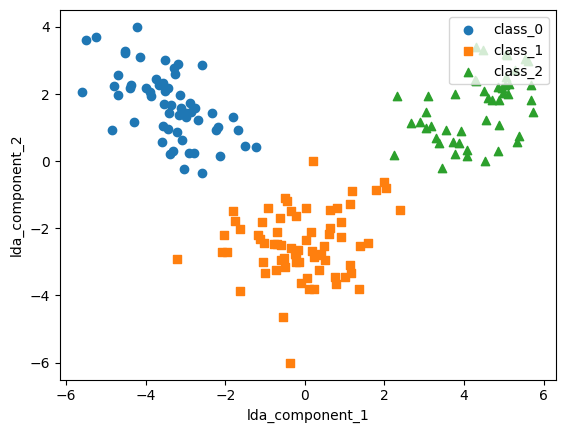

In [31]:
## column과 DF를 형성하는 코드를 작성해 주세요.
lda_columns = ['lda_component_1', 'lda_component_2']
wineDF_lda = pd.DataFrame(wine_lda, columns=lda_columns)
wineDF_lda['target'] = wine.target

## marker 설정
# Class 0은 동그라미, Class 1은 네모, Class 2는 세모로 표현
markers =  ['o', 's', '^']

## 시각화
# 각 class별로 다른 모양으로 산점도를 만들어 주세요.
for i, marker in enumerate(markers):
    x_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
    y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

#**4. SVD(Singular Value Decomposition)**

- 이번에는 SVD 중 자주 활용되는 ```TruncatedSVD```를 이용해 실습해 보겠습니다.

###**4-a. scaled되지 않은 wine data를 활용해 TruncatedSVD를 적용하고, 이를 plot으로 시각화 해주세요.**
- ```n_components = 2```로 시행해 주세요.

In [33]:
# 코드를 실행해 주세요.
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

wine = load_iris()
wine_ftrs = wine.data

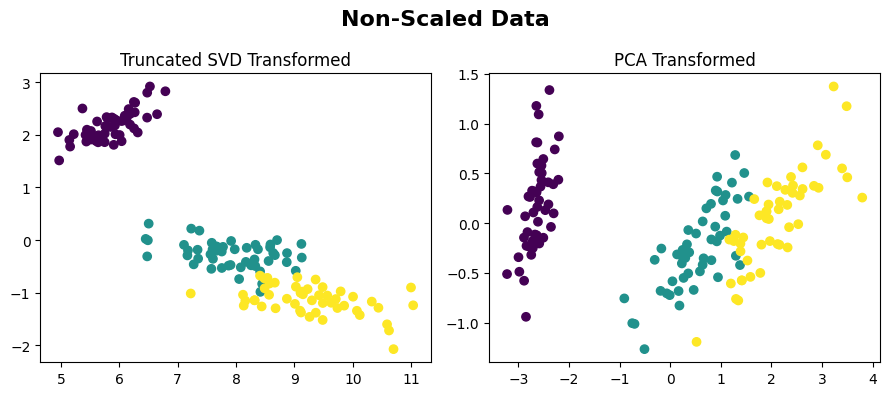

In [41]:
# 2개의 주요 컴포넌트로 TruncatedSVD 변환을 해주세요.
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)


# 스케일링되지 않은 데이터를 기반으로 PCA 변환을 수행해 주세요.
pca = PCA(n_components=2)
pca.fit(wine_ftrs)
wine_pca = pca.transform(wine_ftrs)


# 마지막으로, 이 둘을 비교할 수 있도록 산점도 plot을 각각 시각화 해주세요.
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
ax2.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], c=wine.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

fig.suptitle('Non-Scaled Data', fontsize = 16, fontweight ="bold")
fig.tight_layout()
plt.show()

###**4-b. scaled 된 wine data를 활용해 TruncatedSVD를 적용하고, 이를 plot으로 시각화 해주세요.**

In [35]:
# 코드를 실행해 주세요.
from sklearn.preprocessing import StandardScaler

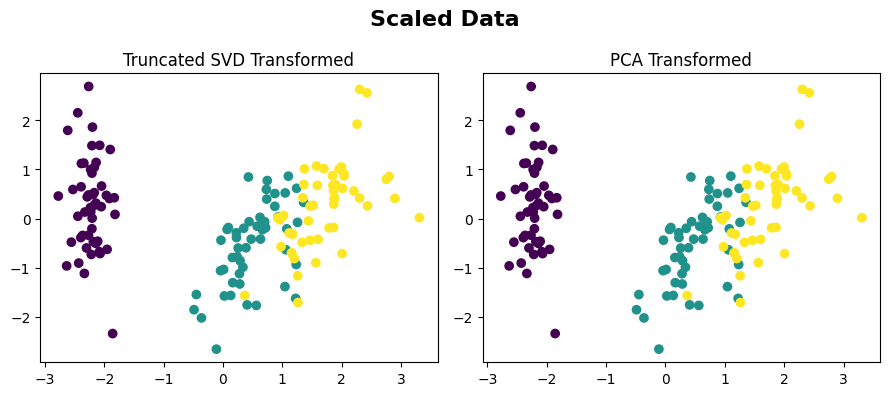

In [40]:
# Wine 데이터를 StandardScaler로 변환시켜 주세요.
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환을 수행해 주세요.
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_scaled)
wine_tsvd = tsvd.transform(wine_scaled)


#스케일링된 데이터를 기반으로 PCA 변환을 수행해 주세요.
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)


# 마지막으로, 이 둘을 비교할 수 있도록 산점도 plot을 각각 시각화 해주세요.
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
ax2.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], c=wine.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

fig.suptitle('Scaled Data', fontsize = 16, fontweight ="bold")
fig.tight_layout()
plt.show()

# **5. NMF(Non-Negative Matrix Factorization)**

- 위스콘신 유방암 데이터 세트를 이용하여 ```NMF``` 실습을 진행하겠습니다.

In [49]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 준비
cancer = load_breast_cancer()
cancer_ftrs = cancer.data

### **5-a. NMF 학습**
- ```n_components = 2```

In [50]:
## 모델 객체 생성
nmf = NMF(n_components=2)

## 학습
nmf.fit(cancer_ftrs)

###  # 모델 객체 학습
cancer_nmf = nmf.transform(cancer_ftrs)

### **5-b. 시각화**
- x축을 첫 번째 컴포넌트로, y축을 두 번째 컴포넌트로 설정 후 scatter plot으로 시각화 해주세요.
- class 별로 다른 색상으로 시각화 해주세요.

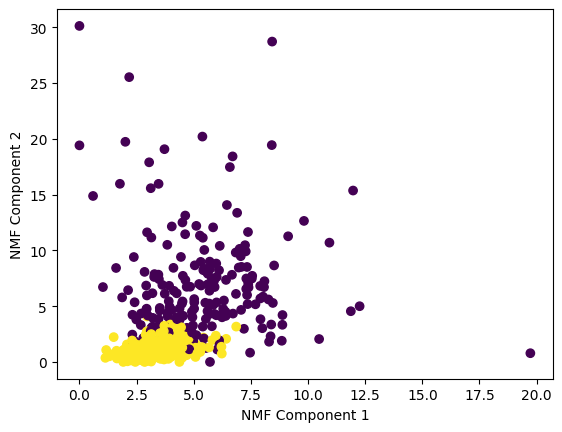

In [51]:
## scatter plot 시각화
plt.scatter(x=cancer_nmf[:, 0], y=cancer_nmf[:, 1], c=cancer.target)

plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()